<a href="https://colab.research.google.com/github/Mechais/LE2_ENDAYA_JC/blob/main/LE2_Endaya_JC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Data/Raisin.csv")

# Initial dataset size
initial_rows, initial_cols = data.shape

# Handle null values
null_values_count = data.isnull().sum().sum()
if null_values_count > 0:
    print(f"{null_values_count} null values found in the dataset. Handling null values...")
    data.dropna(inplace=True)
    print("Null values have been removed.")

# Handle duplicates
duplicates_count = data.duplicated().sum()
if duplicates_count > 0:
    print(f"{duplicates_count} duplicate rows found in the dataset. Handling duplicates...")
    data.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")

# Updated dataset size
updated_rows, updated_cols = data.shape

# Display basic information about the dataset after cleaning
print("\nDataset Information After Cleaning:")
print(data.info())

# Display summary statistics of the dataset after cleaning
print("\nSummary Statistics After Cleaning:")
print(data.describe())

# Summary of cleaning process
print("\nCleaning Summary:")
print(f"Initial Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Rows Removed: {initial_rows - updated_rows}")
print(f"Columns Removed: {initial_cols - updated_cols}")



Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB
None

Summary Statistics After Cleaning:
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min    


Logistic Regression Results:
Accuracy: 85.56%
Classification Report:
              precision    recall  f1-score   support

       Besni       0.83      0.87      0.85        86
     Kecimen       0.88      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



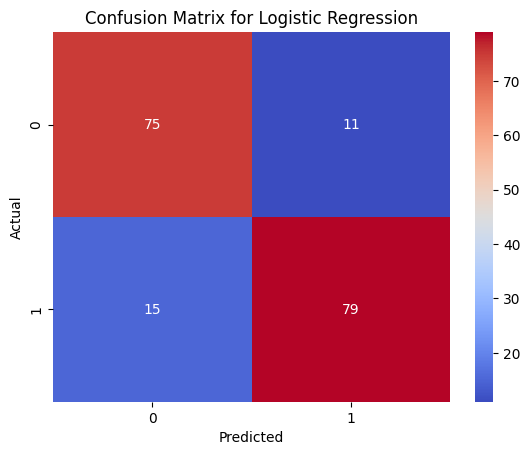


Decision Tree Results:
Accuracy: 78.33%
Classification Report:
              precision    recall  f1-score   support

       Besni       0.77      0.78      0.77        86
     Kecimen       0.80      0.79      0.79        94

    accuracy                           0.78       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.78      0.78      0.78       180



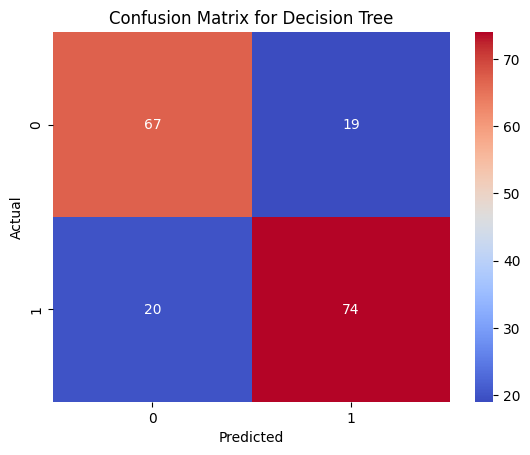


Random Forest Results:
Accuracy: 84.44%
Classification Report:
              precision    recall  f1-score   support

       Besni       0.85      0.81      0.83        86
     Kecimen       0.84      0.87      0.85        94

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180



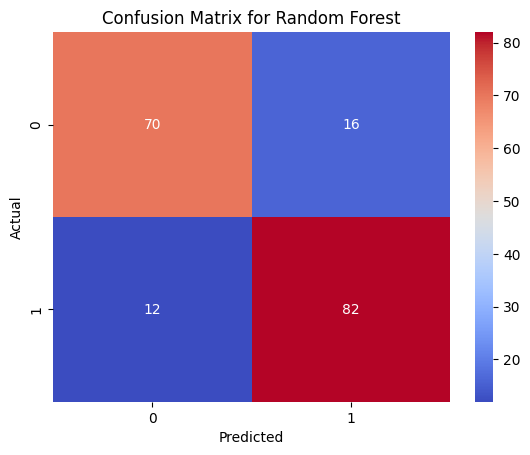


Support Vector Machine Results:
Accuracy: 85.00%
Classification Report:
              precision    recall  f1-score   support

       Besni       0.86      0.81      0.84        86
     Kecimen       0.84      0.88      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



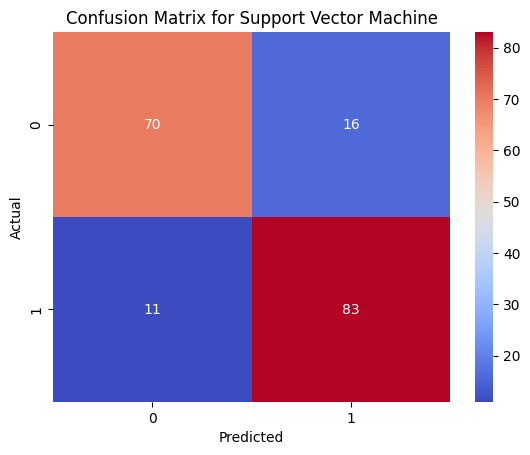

In [3]:
# Separate features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=[np.number]).columns

# Preprocessing pipeline for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC()
}

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store results
results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }

    # Print results
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(report)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Scores with RFE-selected features:
Logistic Regression: 85.00%
Decision Tree: 80.00%
Random Forest: 86.67%
Support Vector Machine: 85.00%


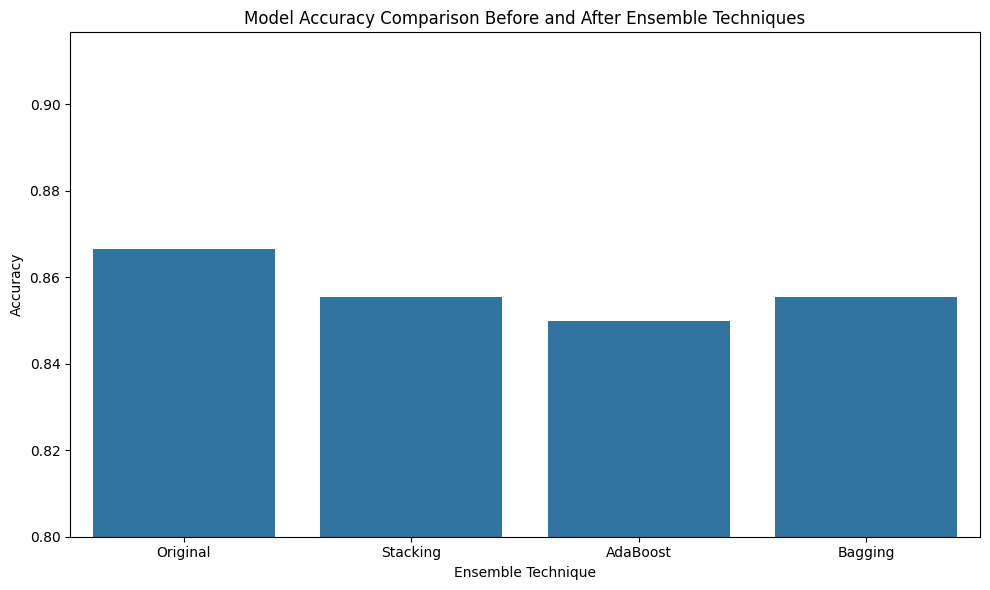

Summary of Model Accuracies:
Original: 86.67%
Stacking: 85.56%
AdaBoost: 85.00%
Bagging: 85.56%


In [5]:
# Feature selection using RFE
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10)
rfe.fit(X_train, y_train)

X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Define models for RFE selected features
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

# Print scores after RFE

print("\nScores with RFE-selected features:")
for name, accuracy in results_rfe_selected_features.items():
    print(f"{name}: {accuracy * 100:.2f}%")

# Find the highest performing model

highest_model_name = max(results_rfe_selected_features, key=results_rfe_selected_features.get)
highest_model = models[highest_model_name]

# Applying ensemble techniques to the highest performing model

# Stacking Classifier
stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=LogisticRegression(max_iter=10000))
stacking_model.fit(X_train_selected, y_train)
stacking_accuracy = stacking_model.score(X_test_selected, y_test)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=highest_model, n_estimators=100, algorithm='SAMME')
adaboost_model.fit(X_train_selected, y_train)
adaboost_accuracy = adaboost_model.score(X_test_selected, y_test)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=highest_model, n_estimators=100)
bagging_model.fit(X_train_selected, y_train)
bagging_accuracy = bagging_model.score(X_test_selected, y_test)

# Plotting
models_accuracy = {
    "Original": results_rfe_selected_features[highest_model_name],
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()))
plt.xlabel('Ensemble Technique')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Before and After Ensemble Techniques')

# Adjust the y-axis limits dynamically
plt.ylim(min(models_accuracy.values()) - 0.05, max(models_accuracy.values()) + 0.05)
plt.tight_layout()
plt.show()

# Print summary of all scores
print("Summary of Model Accuracies:")
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy * 100:.2f}%")

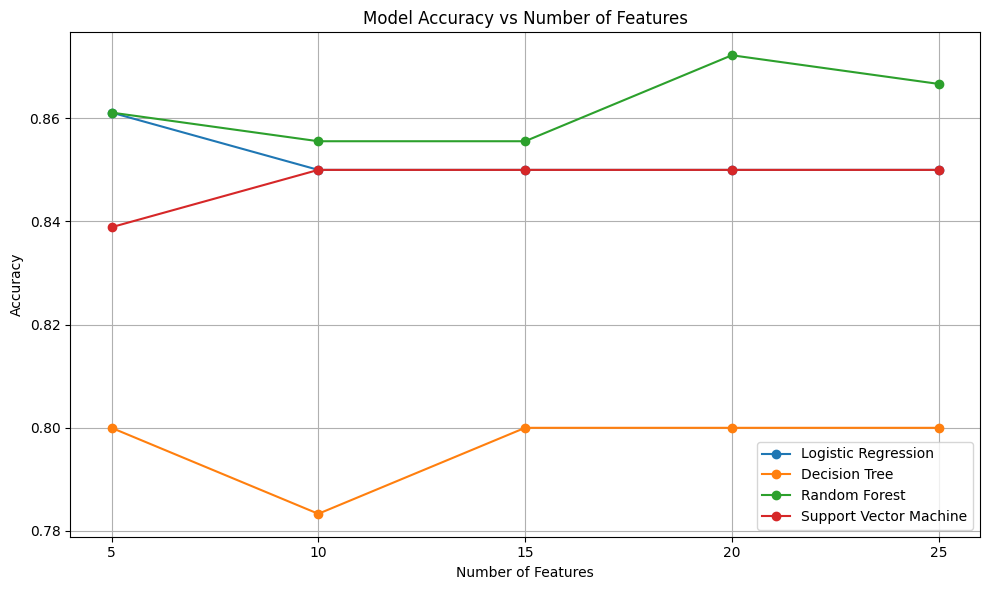

In [7]:
# Initialize results list for different numbers of features
results_num_features = []

# Define models again (to avoid potential conflicts)
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Loop through different numbers of features
for num_features in [5, 10, 15, 20, 25]:
    # Create RFE object and specify the number of features to select
    rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=num_features)

    # Fit RFE to training data (excluding the target variable)
    rfe.fit(X_train, y_train)

    # Transform the training and testing data to include only the selected features
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)

    # Train and evaluate models with RFE-selected features
    model_results = {}
    for name, model in models.items():
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, predictions)
        model_results[name] = accuracy

    # Store results
    results_num_features.append((num_features, model_results))

# Plotting
plt.figure(figsize=(10, 6))
for name, _ in models.items():
    accuracies = [model_results[name] for _, model_results in results_num_features]
    plt.plot([num_features for num_features, _ in results_num_features], accuracies, marker='o', label=name)

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Number of Features')
plt.legend()
plt.grid(True)
plt.xticks([5, 10, 15, 20, 25])
plt.tight_layout()
plt.show()